## BOAZ Mini Project

### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
0. Preprocess; normalization, feature selection, etc.
1. Model selection; characteristics of datasets need to be comprehended.
2. Evaluation; This step should be done properly to prevent overfitting problem."
3. Enhancement; parameter tuning and feature selection, etc.

# EDA

## 라이브러리

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
%matplotlib inline

## 데이터 불러오기

In [2]:
df_train = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_train.csv')
df_dev = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_dev.csv')
df_test = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_test_no_ylabel.csv')

In [3]:
df_train['TEST'] = 0
df_dev['TEST'] = 0
df_test['TEST'] = 1

In [4]:
print('Number of entries:', df_train.shape[0])
print('Number of entries:', df_dev.shape[0])
print('Number of entries:', df_test.shape[0])
# train 180만개, dev 60만개, test 54만개

Number of entries: 1802458
Number of entries: 600000
Number of entries: 541560


In [53]:
print('Nunber of null:', df_train.isnull().sum())
print('Nunber of null:', df_dev.isnull().sum())
print('Nunber of null:', df_test.isnull().sum())
# soc와 lon,lat에 null 많음

Nunber of null: Unnamed: 0                0
CASE_STATUS               8
EMPLOYER_NAME            35
SOC_NAME              10706
JOB_TITLE                26
FULL_TIME_POSITION        9
PREVAILING_WAGE          51
YEAR                      8
WORKSITE                  0
lon                   64045
lat                   64045
TEST                      0
dtype: int64
Nunber of null: Unnamed: 0                0
CASE_STATUS               2
EMPLOYER_NAME            14
SOC_NAME               3508
JOB_TITLE                 9
FULL_TIME_POSITION        3
PREVAILING_WAGE          22
YEAR                      2
WORKSITE                  0
lon                   21584
lat                   21584
TEST                      0
dtype: int64
Nunber of null: Unnamed: 0                0
EMPLOYER_NAME             1
SOC_NAME               3146
JOB_TITLE                 3
FULL_TIME_POSITION        0
PREVAILING_WAGE           5
YEAR                      0
WORKSITE                  0
lon                   19559
la

In [4]:
df_all = pd.concat([df_train, df_test])
df_all = pd.concat([df_all, df_dev])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [5]:
df_train = pd.concat([df_train,df_dev])

In [6]:
print('Number of entries:', df_all.shape[0])
print(df_all.isnull().sum())

Number of entries: 2944018
CASE_STATUS           541570
EMPLOYER_NAME             50
FULL_TIME_POSITION        12
JOB_TITLE                 38
PREVAILING_WAGE           78
SOC_NAME               17360
TEST                       0
Unnamed: 0                 0
WORKSITE                   0
YEAR                      10
lat                   105188
lon                   105188
dtype: int64


## 일단 train으로 전처리

In [7]:
df_train.head()
# CASE_STATUS -> CERTIFIED or DENIED
# EMPLOYER_NAME -> 고용주 회사
# SOC_NAME -> 직업군
# JOB_TITLE -> 직무

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,TEST
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830,0
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,0
2,1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180,0
3,2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649,0
4,1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949,0


### Certified랑 Denied만 남기기

In [8]:
df_train = df_train[df_train.CASE_STATUS != 'REJECTED']
df_train = df_train[df_train.CASE_STATUS != 'WITHDRAWN'] 
df_train = df_train[df_train.CASE_STATUS != 'CERTIFIED-WITHDRAWN']
df_train = df_train[df_train.CASE_STATUS != 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']

In [102]:
df_train['CASE_STATUS'].value_counts().sort_values(ascending=False)

CERTIFIED    2092970
DENIED         75439
Name: CASE_STATUS, dtype: int64

In [103]:
print(df_train.isnull().sum())

Unnamed: 0                0
CASE_STATUS              10
EMPLOYER_NAME            27
SOC_NAME              12757
JOB_TITLE                17
FULL_TIME_POSITION       11
PREVAILING_WAGE          58
YEAR                     10
WORKSITE                  0
lon                   77512
lat                   77512
TEST                      0
dtype: int64


In [9]:
df_train['CASE_STATUS'] = df_train['CASE_STATUS'].replace('CERTIFIED',0)
df_train['CASE_STATUS'] = df_train['CASE_STATUS'].replace('DENIED',1)

In [178]:
df_train['CASE_STATUS'].value_counts().sort_values(ascending=False)

0.0    2092970
1.0      75439
Name: CASE_STATUS, dtype: int64

In [180]:
75439/(2092970+75439)
#DINIED 비율 = 3%

0.034790023468819764

### Full_time_position 변환

In [10]:
df_train['FULL_TIME_POSITION'] = df_train['FULL_TIME_POSITION'].replace('Y',1)
df_train['FULL_TIME_POSITION'] = df_train['FULL_TIME_POSITION'].replace('N',0)

### Prevailing_wage 변수 log 변환

In [17]:
dfwage = df_train['PREVAILING_WAGE'].dropna()
dfwage.head()

0    61589.0
1    79144.0
2    73882.0
3    61589.0
5    42120.0
Name: PREVAILING_WAGE, dtype: float64

In [18]:
dfwage.isnull().sum()

0

(0, 200000)

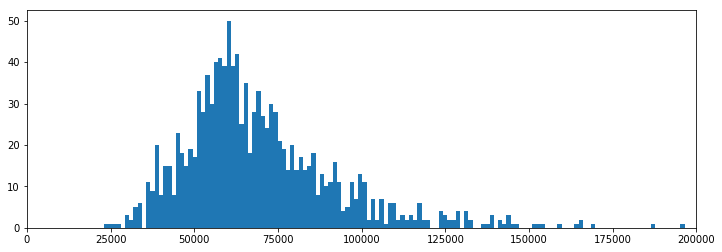

In [19]:
plt.subplots(1, 1, figsize=(12, 4))
plt.hist(dfwage[:1200],bins = 200)
plt.xlim([0, 200000])

In [20]:
logwage=np.log(df_train['PREVAILING_WAGE'])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(9, 13)

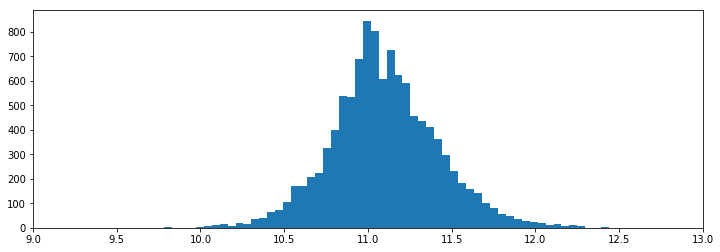

In [24]:
plt.subplots(1, 1, figsize=(12, 4))
plt.hist(logwage[:11000].dropna(),bins = 200)
plt.xlim([9, 13])

In [25]:
df_train['PREVAILING_WAGE'] = np.log(df_train['PREVAILING_WAGE'])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


### Employer_name

In [26]:
df_train['EMPLOYER_NAME'].sort_values()
# EMPLOYER_NAME 간단한 텍스트 전처리 필요

898123                       "I HAVE A DREAM" FOUNDATION
52568                                   "K" LINE AMERICA
1461640                                 "K" LINE AMERICA
1419485                                 "K" LINE AMERICA
446264                                  "K" LINE AMERICA
782746                            "K" LINE AMERICA, INC.
1785766                           "K" LINE AMERICA, INC.
549252                            "K" LINE AMERICA, INC.
413143                            "K" LINE AMERICA, INC.
1056834                           "K" LINE AMERICA, INC.
596871                            "K" LINE AMERICA, INC.
1684026                 "K" LINE LOGISITCS (U.S.A.) INC.
45913                        "K" LINE LOGISTICS USA INC.
758887                       "K" LINE LOGISTICS USA INC.
1167350                     "K" LINE LOGISTICS USA, INC.
123895                        &QUOT;K&QUOT; LINE AMERICA
1308957                          &TV COMMUNICATIONS INC.
871877                         

In [27]:
df_train['EMPLOYER_NAME'] = df_train['EMPLOYER_NAME'].str.replace('.','')

In [28]:
df_train['EMPLOYER_NAME'] = df_train['EMPLOYER_NAME'].str.replace(',','')

In [29]:
employer = df_train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)
print(employer.count())
print(employer[0:10])
# 회사 종류 18만, INFOSYS 약 10만, 전처리 후 약 2만개 integrated

182875
INFOSYS LIMITED                      104225
TATA CONSULTANCY SERVICES LIMITED     51441
WIPRO LIMITED                         34776
DELOITTE CONSULTING LLP               29355
ACCENTURE LLP                         26560
IBM INDIA PRIVATE LIMITED             22594
MICROSOFT CORPORATION                 17868
HCL AMERICA INC                       17853
ERNST & YOUNG US LLP                  14648
CAPGEMINI AMERICA INC                 13466
Name: EMPLOYER_NAME, dtype: int64


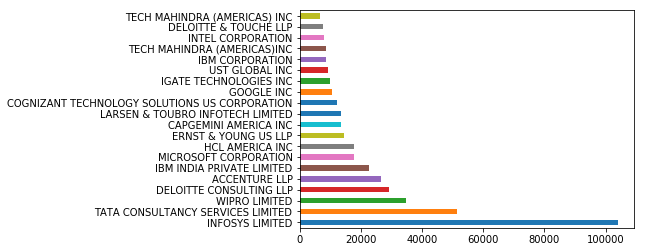

In [160]:
df_train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:20].plot.barh()

In [167]:
df_train.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,TEST
0,1349742,0.0,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,Computer Programmers,PROGRAMMER ANALYST,1.0,11.028239,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830,0
1,789205,0.0,GOOGLE INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,1.0,11.279024,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,0
2,1617140,0.0,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,1.0,11.210225,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180,0
3,2757905,0.0,CPO SERVICES INC,Orthotists and Prosthetists,STAFF PROSTHETIST,1.0,11.028239,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649,0
5,693102,1.0,UNIVERSITY OF CALIFORNIA SAN DIEGO,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,1.0,10.648278,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811,0


### SOC_NAME

In [84]:
df_train['SOC_NAME'].head()

0                           COMPUTER PROGRAMMERS
1    NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS
2                COMPUTER OCCUPATIONS, ALL OTHER
3                    ORTHOTISTS AND PROSTHETISTS
5     MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS
Name: SOC_NAME, dtype: object

In [30]:
df_train['SOC_NAME'] = df_train['SOC_NAME'].str.upper()

In [85]:
soc = df_train['SOC_NAME'].value_counts().sort_values(ascending=False)
print(soc.count())
print(soc[0:10])
# 944 -> 1422 로 integrated

1422
COMPUTER SYSTEMS ANALYSTS                      375335
SOFTWARE DEVELOPERS, APPLICATIONS              297635
COMPUTER PROGRAMMERS                           288529
COMPUTER OCCUPATIONS, ALL OTHER                131892
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           60691
MANAGEMENT ANALYSTS                             49667
ACCOUNTANTS AND AUDITORS                        39818
FINANCIAL ANALYSTS                              37462
MECHANICAL ENGINEERS                            31807
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     28963
Name: SOC_NAME, dtype: int64


In [129]:
soc_name = df_train['SOC_NAME'].value_counts().sort_values()

In [146]:
soc_name1 = soc_name[soc_name == 1]
soc_name1.count()
#soc_name 1개가 362 이후로 136 79 50 41 25 20 24 22

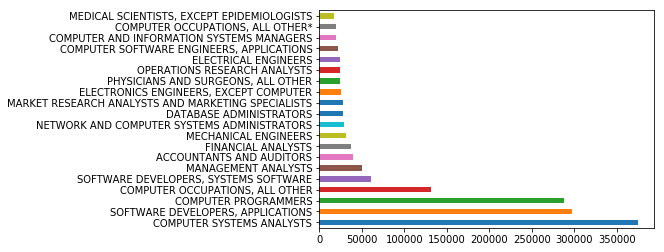

In [76]:
df_train['SOC_NAME'].value_counts().sort_values(ascending=False)[:20].plot.barh()
#컴퓨터 관련 직종이 매우 많음

### Year

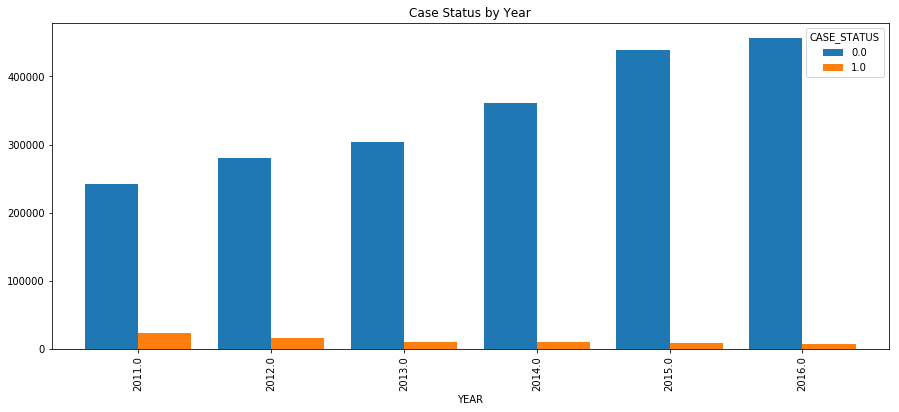

,YEAR,CASE_STATUS,SOC_NAME
0,2011.0,0.0,241665
1,2011.0,1.0,23222
2,2012.0,0.0,279992
3,2012.0,1.0,16746
4,2013.0,0.0,304049
5,2013.0,1.0,9617
6,2014.0,0.0,360832
7,2014.0,1.0,9465
8,2015.0,0.0,438189
9,2015.0,1.0,8720


In [32]:
case_year = df_train.groupby(['YEAR','CASE_STATUS'])['SOC_NAME'].count().reset_index()
case_year.pivot('YEAR','CASE_STATUS','SOC_NAME').plot.bar(width=0.8)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Case Status by Year')
plt.show()
case_year

In [33]:
count_cer = case_year.loc[case_year['CASE_STATUS'] == 0]
count_de = case_year.loc[case_year['CASE_STATUS'] == 1]
rate = count_cer['SOC_NAME'].values / (count_cer['SOC_NAME'].values + count_de['SOC_NAME'].values)
rate #연도에 따라 certificated 비율이 늘어나고 있다

array([0.91233243, 0.94356638, 0.96934   , 0.97443944, 0.9804882 ,
       0.98428854])

### NaN 탐구

In [34]:
print(df_train.shape[0])
print(df_train.isnull().sum())

2168419
Unnamed: 0                0
CASE_STATUS              10
EMPLOYER_NAME            27
SOC_NAME              12757
JOB_TITLE                17
FULL_TIME_POSITION       11
PREVAILING_WAGE          58
YEAR                     10
WORKSITE                  0
lon                   77512
lat                   77512
TEST                      0
dtype: int64


In [35]:
df_train = df_train[df_train['CASE_STATUS'].isnull() == False]

#### Employer_name

In [36]:
df_emplo = df_train[df_train['EMPLOYER_NAME'].isnull() == True]
print(df_emplo['CASE_STATUS'].value_counts().sort_values())

1.0     6
0.0    11
Name: CASE_STATUS, dtype: int64


#### Soc_name

In [37]:
df_soc = df_train[df_train['SOC_NAME'].isnull() == True]
print(df_soc['CASE_STATUS'].value_counts().sort_values())
392 / (392+12355)
#soc_name의 null 여부는 denied에 별 영향이 없는 듯 하다

1.0      392
0.0    12355
Name: CASE_STATUS, dtype: int64


0.030752333882482153

#### Job_title

In [38]:
df_job = df_train[df_train['JOB_TITLE'].isnull() == True]
print(df_job['CASE_STATUS'].value_counts().sort_values())

0.0    2
1.0    5
Name: CASE_STATUS, dtype: int64


#### Prevailing_wage

In [39]:
df_wage = df_train[df_train['PREVAILING_WAGE'].isnull() == True]
print(df_wage['CASE_STATUS'].value_counts().sort_values())
#wage 없으면 무조건 denied

1.0    48
Name: CASE_STATUS, dtype: int64


#### Full_time_position

In [40]:
df_position = df_train[df_train['FULL_TIME_POSITION'].isnull() == True]
print(df_position['CASE_STATUS'].value_counts().sort_values())
#1명이긴 하지만 denied

1.0    1
Name: CASE_STATUS, dtype: int64


#### lon, lat

In [41]:
df_lon = df_train[df_train['lon'].isnull() == True]
print(df_lon['CASE_STATUS'].value_counts().sort_values())
6886 / (6886+70626)
# 8%...? 

1.0     6886
0.0    70626
Name: CASE_STATUS, dtype: int64


0.08883785736402106

### Nan 탐구 결과 
1. wage, full time이 없으면 denied
2. employer_name, job_title, lon, lat도 유의미한 영향을 미치는 것으로 보임, lon,lat은 왜인지 모르겠음

In [187]:
df_train.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,TEST,State
0,1349742,0.0,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,1.0,11.028239,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830,0,CALIFORNIA
1,789205,0.0,GOOGLE INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,1.0,11.279024,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,0,CALIFORNIA
2,1617140,0.0,WIPRO LIMITED,"COMPUTER OCCUPATIONS, ALL OTHER",PROJECT MANAGER,1.0,11.210225,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180,0,CALIFORNIA
3,2757905,0.0,CPO SERVICES INC,ORTHOTISTS AND PROSTHETISTS,STAFF PROSTHETIST,1.0,11.028239,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649,0,ILLINOIS
5,693102,1.0,UNIVERSITY OF CALIFORNIA SAN DIEGO,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,1.0,10.648278,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811,0,CALIFORNIA


# Feature Engineering

## Certified rate (연도 별로 SOC랑 Employer에 대해서)

In [156]:
cer_rate_2011 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2011 = cer_rate_2011[cer_rate_2011['YEAR'] == 2011]
cer_rate_2011 = cer_rate_2011.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2011 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2011 = de_rate_2011[de_rate_2011['YEAR'] == 2011]
de_rate_2011 = de_rate_2011.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2011 = cer_rate_2011.sort_values('YEAR', ascending = False)
de_2011 = de_rate_2011.sort_values('YEAR',ascending =False)

count_cer_2011 = cer_2011['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2011 = de_2011['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_de_2011.count())
print(count_cer_2011.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 72개 

580
652


In [158]:
cer_rate_2012 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2012 = cer_rate_2012[cer_rate_2012['YEAR'] == 2012]
cer_rate_2012 = cer_rate_2012.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2012 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2012 = de_rate_2012[de_rate_2012['YEAR'] == 2012]
de_rate_2012 = de_rate_2012.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2012 = cer_rate_2012.sort_values('YEAR', ascending = False)
de_2012 = de_rate_2012.sort_values('YEAR',ascending =False)

count_cer_2012 = cer_2012['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2012 = de_2012['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_de_2012.count())
print(count_cer_2012.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 70개

459
529


In [160]:
cer_rate_2013 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2013 = cer_rate_2013[cer_rate_2013['YEAR'] == 2013]
cer_rate_2013 = cer_rate_2013.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2013 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2013 = de_rate_2013[de_rate_2013['YEAR'] == 2013]
de_rate_2013 = de_rate_2013.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2013 = cer_rate_2013.sort_values('YEAR', ascending = False)
de_2013 = de_rate_2013.sort_values('YEAR',ascending =False)

count_cer_2013 = cer_2013['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2013 = de_2013['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_cer_2013.count())
print(count_de_2013.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 120개 

531
418


In [162]:
cer_rate_2014 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2014 = cer_rate_2014[cer_rate_2014['YEAR'] == 2014]
cer_rate_2014 = cer_rate_2014.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2014 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2014 = de_rate_2014[de_rate_2014['YEAR'] == 2014]
de_rate_2014 = de_rate_2014.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2014 = cer_rate_2014.sort_values('YEAR', ascending = False)
de_2014 = de_rate_2014.sort_values('YEAR',ascending =False)

count_cer_2014 = cer_2014['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2014 = de_2014['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_cer_2014.count())
print(count_de_2014.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 123개 

541
418


In [163]:
cer_rate_2015 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2015 = cer_rate_2015[cer_rate_2015['YEAR'] == 2015]
cer_rate_2015 = cer_rate_2015.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2015 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2015 = de_rate_2015[de_rate_2015['YEAR'] == 2015]
de_rate_2015 = de_rate_2015.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2015 = cer_rate_2015.sort_values('YEAR', ascending = False)
de_2015 = de_rate_2015.sort_values('YEAR',ascending =False)

count_cer_2015 = cer_2015['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2015 = de_2015['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_cer_2015.count())
print(count_de_2015.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 421개 

867
446


In [164]:
cer_rate_2016 = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_2016 = cer_rate_2016[cer_rate_2016['YEAR'] == 2016]
cer_rate_2016 = cer_rate_2016.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_2016 = df_train[df_train['CASE_STATUS'] == 1]
de_rate_2016 = de_rate_2016[de_rate_2016['YEAR'] == 2016]
de_rate_2016 = de_rate_2016.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_2016 = cer_rate_2016.sort_values('YEAR', ascending = False)
de_2016 = de_rate_2016.sort_values('YEAR',ascending =False)

count_cer_2016 = cer_2016['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_2016 = de_2016['SOC_NAME'].value_counts().sort_values(ascending=True)
print(count_cer_2016.count())
print(count_de_2016.count())
#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 약 397개 

816
419


In [199]:
cer_de_2011 = pd.merge(cer_2011,de_2011,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2011['Certified_rate'] = cer_de_2011['YEAR_x']/(cer_de_2011['YEAR_x']+cer_de_2011['YEAR_y'])
cer_de_2011.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
124,"BIOLOGICAL SCIENCE TEACHERS, POSTSECONDARY",0.981651
254,WEB ADMINISTRATORS,0.979592
287,"LAW TEACHERS, POSTSECONDARY",0.972222
290,CLINICAL PSYCHOLOGISTS,0.971429
221,"CIVIL ENGINEERS, R&D",0.970588
13,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,0.970569
133,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,0.969697
294,COMPENSATION AND BENEFITS MANAGERS,0.969697
47,"HEALTH SPECIALTIES TEACHERS, POSTSECONDARY",0.967306
305,"SOCIAL SCIENCES TEACHERS, POSTSECONDARY, ALL O...",0.966667


In [198]:
cer_de_2012 = pd.merge(cer_2012,de_2012,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2012['Certified_rate'] = cer_de_2012['YEAR_x']/(cer_de_2012['YEAR_x']+cer_de_2012['YEAR_y'])
cer_de_2012.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
168,"HISTORY TEACHERS, POSTSECONDARY",0.989899
180,ATMOSPHERIC AND SPACE SCIENTISTS,0.987805
195,"CIVIL ENGINEERS, R&D",0.985714
3,"COMPUTER OCCUPATIONS, ALL OTHER*",0.980730
228,ANIMAL BREEDERS,0.978723
0,COMPUTER SYSTEMS ANALYSTS,0.977808
89,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,0.975684
1,COMPUTER PROGRAMMERS,0.972176
42,"HEALTH SPECIALTIES TEACHERS, POSTSECONDARY",0.971496
250,"AREA, ETHNIC, AND CULTURAL STUDIES TEACHERS, P...",0.971429


In [197]:
cer_de_2013 = pd.merge(cer_2013,de_2013,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2013['Certified_rate'] = cer_de_2013['YEAR_x']/(cer_de_2013['YEAR_x']+cer_de_2013['YEAR_y'])
cer_de_2013.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
131,MATHEMATICIANS,0.993289
92,WEB DEVELOPERS,0.990099
50,COMPUTER HARDWARE ENGINEERS,0.989884
170,GEOLOGICAL AND PETROLEUM TECHNICIANS,0.989247
180,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,0.987500
129,"PHYSICAL SCIENTISTS, ALL OTHER",0.986842
188,ACCOUNTANTS,0.986486
3,"COMPUTER OCCUPATIONS, ALL OTHER",0.985712
61,ECONOMISTS,0.985477
0,COMPUTER SYSTEMS ANALYSTS,0.985020


In [200]:
cer_de_2014 = pd.merge(cer_2014,de_2014,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2014['Certified_rate'] = cer_de_2014['YEAR_x']/(cer_de_2014['YEAR_x']+cer_de_2014['YEAR_y'])
cer_de_2014.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
148,"POSTSECONDARY TEACHERS, ALL OTHER",0.992248
49,COMPUTER HARDWARE ENGINEERS,0.989730
3,"COMPUTER OCCUPATIONS, ALL OTHER",0.988344
0,COMPUTER SYSTEMS ANALYSTS,0.987319
10,DATABASE ADMINISTRATORS,0.986034
2,COMPUTER PROGRAMMERS,0.985297
201,FINANCIAL EXAMINERS,0.983871
206,"CIVIL ENGINEERS, R&D",0.983333
1,"SOFTWARE DEVELOPERS, APPLICATIONS",0.982551
125,MARINE ENGINEERS AND NAVAL ARCHITECTS,0.981928


In [201]:
cer_de_2015 = pd.merge(cer_2015,de_2015,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2015['Certified_rate'] = cer_de_2015['YEAR_x']/(cer_de_2015['YEAR_x']+cer_de_2015['YEAR_y'])
cer_de_2015.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
62,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,0.998361
114,MATHEMATICIANS,0.995495
79,COMPUTER SYSTEMS ANALYST,0.992701
158,"HEALTH AND SAFETY ENGINEERS, EXCEPT MINING SAFETY",0.991803
3,"COMPUTER OCCUPATIONS, ALL OTHER",0.990994
0,COMPUTER SYSTEMS ANALYSTS,0.990775
96,PETROLEUM ENGINEERS,0.990596
173,ATMOSPHERIC AND SPACE SCIENTISTS,0.990385
20,STATISTICIANS,0.990333
180,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS*,0.989474


In [202]:
cer_de_2016 = pd.merge(cer_2016,de_2016,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_2016['Certified_rate'] = cer_de_2016['YEAR_x']/(cer_de_2016['YEAR_x']+cer_de_2016['YEAR_y'])
cer_de_2016.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
5,COMPUTER SYSTEMS ANALYST,0.999701
29,COMPUTER PROGRAMMER,0.999402
21,SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS,0.999244
66,COMPUTER SYSTEMS ENGINEERS,0.998264
53,INFORMATION TECHNOLOGY PROJECT MANAGERS,0.997472
34,COMPUTER SYSTEMS ENGINEERS/ARCHITECTS,0.997139
109,BUSINESS INTELLIGENCE ANALYSTS,0.996124
2,COMPUTER PROGRAMMERS,0.992122
32,CHEMISTS,0.992079
3,"COMPUTER OCCUPATIONS, ALL OTHER",0.991420


## Issue
1. soc_name으로만 해봤는데 연도 별로 하면 nan 회사가 더 많아짐
2. 2011년에 apply한 soc 또는 employer가 2012년에도 apply함
3. soc가 영향력이 더 큰가 아니면 연도가 영향력이 더 큰가에 따라서 결정해야하나?
4. 귀찮다 ... 그냥 전체로 묶어서 soc 전체 certified rate, employer 전체 certified rate로 하자...

## Certified rate feature simple version (SOC, Employer)

### SOC certified rate

In [204]:
cer_rate_SOC = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_SOC = cer_rate_SOC.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_SOC = df_train[df_train['CASE_STATUS'] == 1]
de_rate_SOC = de_rate_SOC.groupby(['SOC_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_SOC = cer_rate_SOC.sort_values('YEAR', ascending = False)
de_SOC = de_rate_SOC.sort_values('YEAR',ascending =False)

count_cer_SOC = cer_SOC['SOC_NAME'].value_counts().sort_values(ascending=True)
count_de_SOC = de_SOC['SOC_NAME'].value_counts().sort_values(ascending=True)

print(count_cer_SOC.count())
print(count_de_SOC.count())

#certified에는 속하지만, denied에 하나도 없는 SOC_NAME이 515개, 이녀석들은 평균값으로 대체하자

1376
861


In [210]:
cer_de_SOC = pd.merge(cer_SOC,de_SOC,left_on = 'SOC_NAME',right_on = 'SOC_NAME',how='left')
cer_de_SOC['Certified_rate'] = cer_de_SOC['YEAR_x']/(cer_de_SOC['YEAR_x']+cer_de_SOC['YEAR_y'])
cer_de_SOC.sort_values('Certified_rate',ascending=False)[['SOC_NAME','Certified_rate']][:10]

,SOC_NAME,Certified_rate
21,COMPUTER SYSTEMS ANALYST,0.999492
125,COMPUTER SYSTEMS ENGINEERS,0.999208
130,INFORMATION TECHNOLOGY PROJECT MANAGERS,0.998325
211,BUSINESS INTELLIGENCE ANALYSTS,0.997812
104,COMPUTER PROGRAMMER,0.996094
336,"RECREATION AND FITNESS STUDIES TEACHERS,",0.992000
346,"SOFTWARE DEVELOPER, APPLICATIONS",0.991071
3,"COMPUTER OCCUPATIONS, ALL OTHER",0.989628
386,"COMPUTER PROGRAMMERS, NON R&D",0.987179
320,"LAW TEACHERS, POSTSECONDARY",0.986111


In [217]:
np.mean(cer_de_SOC['Certified_rate'])

0.779476556600537

In [221]:
cer_de_SOC_temp = cer_de_SOC['SOC_NAME']
cer_de_SOC_temp = pd.concat([cer_de_SOC_temp,cer_de_SOC['Certified_rate']],axis=1)
df_train_temp = pd.merge(df_train,cer_de_SOC_temp,left_on ='SOC_NAME',right_on='SOC_NAME', how='left')

In [223]:
df_train_temp['Certified_rate'].isnull().sum()

15089

In [228]:
cer_de_SOC_temp = cer_de_SOC['SOC_NAME']
cer_de_SOC_temp = pd.concat([cer_de_SOC_temp,cer_de_SOC['Certified_rate']],axis=1)
df_train = pd.merge(df_train,cer_de_SOC_temp,left_on ='SOC_NAME',right_on='SOC_NAME', how='left')

In [231]:
df_train.rename(columns = {df_train.columns[13] : 'CR_SOC'}, inplace = True )

In [247]:
df_train['CR_SOC'] = df_train['CR_SOC'].fillna(0.779)

### Employer certified rate

In [206]:
cer_rate_Employer = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_Employer = cer_rate_Employer.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_Employer = df_train[df_train['CASE_STATUS'] == 1]
de_rate_Employer = de_rate_Employer.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer_Employer = cer_rate_Employer.sort_values('YEAR', ascending = False)
de_Employer = de_rate_Employer.sort_values('YEAR',ascending =False)

count_cer_Employer = cer_Employer['EMPLOYER_NAME'].value_counts().sort_values(ascending=True)
count_de_Employer = de_Employer['EMPLOYER_NAME'].value_counts().sort_values(ascending=True)

print(count_cer_Employer.count())
print(count_de_Employer.count())

#certified에는 속하지만, denied에 하나도 없는 Employer_name이 130484개, 이녀석들은 평균값으로 대체하자

174693
44209


In [213]:
cer_de_Employer = pd.merge(cer_Employer,de_Employer,left_on = 'EMPLOYER_NAME',right_on = 'EMPLOYER_NAME',how='left')
cer_de_Employer['Certified_rate'] = cer_de_Employer['YEAR_x']/(cer_de_Employer['YEAR_x']+cer_de_Employer['YEAR_y'])
cer_de_Employer.sort_values('Certified_rate',ascending=False)[['EMPLOYER_NAME','Certified_rate']][:10]

,EMPLOYER_NAME,Certified_rate
51,RANDSTAD TECHNOLOGIES LP,0.999225
195,PEOPLE TECH GROUP INC,0.998788
197,CMC AMERICAS INC,0.998783
313,VIRTUE GROUP LLC,0.998328
317,HADIAMONDSTAR SOFTWARE SOLUTIONS LLC,0.998305
323,NAGARRO INC,0.998291
362,ORPINE INC,0.998152
15,TECH MAHINDRA (AMERICAS)INC,0.998127
371,ERP AND ERP CORP,0.998120
6,MICROSOFT CORPORATION,0.998097


In [215]:
np.mean(cer_de_Employer['Certified_rate'])

0.6764722586372935

In [225]:
cer_de_Employer_temp = cer_de_Employer['EMPLOYER_NAME']
cer_de_Employer_temp = pd.concat([cer_de_Employer_temp,cer_de_Employer['Certified_rate']],axis=1)
df_train_temp = pd.merge(df_train,cer_de_Employer_temp,left_on ='EMPLOYER_NAME',right_on='EMPLOYER_NAME', how='left')

In [226]:
df_train_temp['Certified_rate'].isnull().sum()

555455

In [233]:
cer_de_Employer_temp = cer_de_Employer['EMPLOYER_NAME']
cer_de_Employer_temp = pd.concat([cer_de_Employer_temp,cer_de_Employer['Certified_rate']],axis=1)
df_train = pd.merge(df_train,cer_de_Employer_temp,left_on ='EMPLOYER_NAME',right_on='EMPLOYER_NAME', how='left')

In [234]:
df_train.rename(columns = {df_train.columns[14] : 'CR_EMPLOYER'}, inplace = True )

In [253]:
df_train['CR_EMPLOYER'] = df_train['CR_EMPLOYER'].fillna(0.676)

## JOB_TITLE도 Certificated_rate 해볼까?

In [257]:
cer_rate_JOB = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_JOB = cer_rate_JOB.groupby(['JOB_TITLE','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_JOB = df_train[df_train['CASE_STATUS'] == 1]
de_rate_JOB = de_rate_JOB.groupby(['JOB_TITLE','CASE_STATUS'])['YEAR'].count().reset_index()
cer_JOB = cer_rate_JOB.sort_values('YEAR', ascending = False)
de_JOB = de_rate_JOB.sort_values('YEAR',ascending =False)

count_cer_JOB = cer_JOB['JOB_TITLE'].value_counts().sort_values(ascending=True)
count_de_JOB = de_JOB['JOB_TITLE'].value_counts().sort_values(ascending=True)

print(count_cer_JOB.count())
print(count_de_JOB.count())

#certified에는 속하지만, denied에 하나도 없는 JOB_TITLE이 더 많네... 평균이나 내볼까

234883
23014


In [260]:
cer_de_JOB = pd.merge(cer_JOB,de_JOB,left_on = 'JOB_TITLE',right_on = 'JOB_TITLE',how='left')
cer_de_JOB['Certified_rate'] = cer_de_JOB['YEAR_x']/(cer_de_JOB['YEAR_x']+cer_de_JOB['YEAR_y'])
cer_de_JOB.sort_values('Certified_rate',ascending=False)[['JOB_TITLE','Certified_rate']][:10]

,JOB_TITLE,Certified_rate
24,SYSTEMS ENGINEER - US,0.999625
49,DEVELOPER USER INTERFACE,0.999524
35,COMPUTER PROGRAMMER/CONFIGURER 2,0.999254
197,SENIOR TECHNOLOGY ARCHITECT - US,0.999139
198,PRODUCTION SUPPORT ANALYST - US,0.999133
220,TEST CONSULTANT,0.999008
52,TEST ANALYST - US,0.998988
54,TECHNOLOGY ARCHITECT - US,0.998952
229,SOFTWARE ENGINEER AND TESTER,0.998950
7,TECHNOLOGY LEAD - US,0.998932


In [261]:
np.mean(cer_de_JOB['Certified_rate'])

0.6957090833503009

In [268]:
cer_de_JOB_temp = cer_de_JOB['JOB_TITLE']
cer_de_JOB_temp = pd.concat([cer_de_JOB_temp,cer_de_JOB['Certified_rate']],axis=1)
df_train = pd.merge(df_train,cer_de_JOB_temp,left_on ='JOB_TITLE',right_on='JOB_TITLE', how='left')

In [270]:
df_train.rename(columns = {df_train.columns[15] : 'CR_JOB'}, inplace = True )

In [272]:
df_train['CR_JOB'] = df_train['CR_JOB'].fillna(0.696)
#넣어보고 importance 낮으면 빼자

## 내친김에 worksite로도 Certified rate 해보자

### worksite 중에서 주(state)만 가지고 해보자

In [279]:
def state(data):
    states = []
    data_worksite = df_train['WORKSITE']
    for worksite in data_worksite.iloc[:]:
        state = worksite.split(', ')[1]
        states.append(state)
    return pd.DataFrame(states, columns =['State'])

states = state(df_train)
df_train['State'] = states['State']

In [283]:
cer_rate_state = df_train[df_train['CASE_STATUS'] == 0]
cer_rate_state = cer_rate_state.groupby(['State','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate_state = df_train[df_train['CASE_STATUS'] == 1]
de_rate_state = de_rate_state.groupby(['State','CASE_STATUS'])['YEAR'].count().reset_index()
cer_state = cer_rate_state.sort_values('YEAR', ascending = False)
de_state = de_rate_state.sort_values('YEAR',ascending =False)

count_cer_state = cer_state['State'].value_counts().sort_values(ascending=True)
count_de_state = de_state['State'].value_counts().sort_values(ascending=True)

print(count_cer_state.count())
print(count_de_state.count())

#certified에는 속하지만, denied에 하나도 없는 JOB_TITLE이 더 많네... 평균이나 내볼까

53
53


In [285]:
cer_de_state = pd.merge(cer_state,de_state,left_on = 'State',right_on = 'State',how='left')
cer_de_state['Certified_rate'] = cer_de_state['YEAR_x']/(cer_de_state['YEAR_x']+cer_de_state['YEAR_y'])
cer_de_state.sort_values('Certified_rate',ascending=True)[['State','Certified_rate']][:10]
#생각보다 쓸만하다 ? 근데 저 NA는 뭘까 north america는 아니고 na인가 어쨌든 엄청 낮다 2715개가 확인된다

,State,Certified_rate
44,NA,0.781952
49,PUERTO RICO,0.835793
52,WYOMING,0.864437
50,ALASKA,0.864809
43,HAWAII,0.882111
51,MONTANA,0.904360
38,NEVADA,0.908835
40,MISSISSIPPI,0.926370
39,NEW MEXICO,0.934211
33,LOUISIANA,0.938569


In [292]:
cer_de_state_temp = cer_de_state['State']
cer_de_state_temp = pd.concat([cer_de_state_temp,cer_de_state['Certified_rate']],axis=1)
df_train = pd.merge(df_train,cer_de_state_temp,left_on ='State',right_on='State', how='left')

In [295]:
df_train.rename(columns = {df_train.columns[16] : 'CR_state'}, inplace = True )

In [297]:
df_train.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,TEST,State,CR_SOC,CR_EMPLOYER,CR_JOB,CR_state
0,1349742,0.0,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,1.0,11.028239,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830,0,CALIFORNIA,0.981863,0.997976,0.984148,0.964777
1,789205,0.0,GOOGLE INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,1.0,11.279024,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,0,CALIFORNIA,0.979353,0.984573,0.994595,0.964777
2,1617140,0.0,WIPRO LIMITED,"COMPUTER OCCUPATIONS, ALL OTHER",PROJECT MANAGER,1.0,11.210225,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180,0,CALIFORNIA,0.989628,0.995457,0.973240,0.964777
3,2757905,0.0,CPO SERVICES INC,ORTHOTISTS AND PROSTHETISTS,STAFF PROSTHETIST,1.0,11.028239,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649,0,ILLINOIS,0.870370,0.676000,0.696000,0.972906
4,693102,1.0,UNIVERSITY OF CALIFORNIA SAN DIEGO,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,1.0,10.648278,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811,0,CALIFORNIA,0.971542,0.972019,0.973451,0.964777


## Year는 one-hot-encoding

In [301]:
YEAR_OHE = pd.get_dummies(df_train.YEAR)
df_train = pd.concat([df_train,YEAR_OHE],axis=1)
#이것도 certified rate로 할까 했는데 6열만 추가하면 되니까 그냥 살려서 one-hot-encoding

## 기존 변수 delete

In [303]:
del df_train['EMPLOYER_NAME']
del df_train['State']
del df_train['WORKSITE']
del df_train['lon']
del df_train['lat']
del df_train['SOC_NAME']
del df_train['JOB_TITLE']
del df_train['YEAR']
del df_train['TEST']

In [322]:
df_train = df_train[df_train.columns[1:16]]

## 전처리 끝 !

In [332]:
df_train.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,CR_SOC,CR_EMPLOYER,CR_JOB,CR_state,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,0.0,1.0,11.028239,0.981863,0.997976,0.984148,0.964777,0,0,0,1,0,0
1,0.0,1.0,11.279024,0.979353,0.984573,0.994595,0.964777,0,0,0,0,1,0
2,0.0,1.0,11.210225,0.989628,0.995457,0.973240,0.964777,0,0,0,1,0,0
3,0.0,1.0,11.028239,0.870370,0.676000,0.696000,0.972906,1,0,0,0,0,0
4,1.0,1.0,10.648278,0.971542,0.972019,0.973451,0.964777,0,0,0,0,1,0


In [349]:
df_train.to_csv("df_train_taehee.csv", mode='w')

# Model

## Xgboost

In [327]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [336]:
X = df_train.iloc[:,1:13]
y = df_train.iloc[:,0]

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 0)

In [347]:
train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [350]:
#max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
#min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
#gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
#subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
#scale_pos_weight = 1: Because of high class imbalance.
gbm = xgb.XGBClassifier(max_depth=5,
                        n_estimators=1000,
                        learning_rate=0.05,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        scale_pos_weight=1,
                       objective= 'binary:logistic',
                        nthread=4,
                       gamma = 0).fit(train_X, train_y)
predictions = gbm.predict(test_X)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [353]:
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

In [360]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

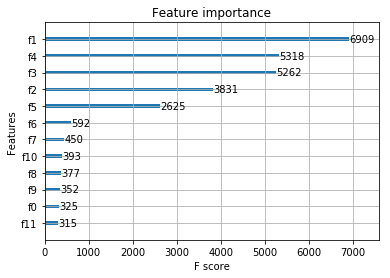

In [354]:
plot_importance(gbm)
pyplot.show()

In [359]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9677667046361159


In [361]:
recall_score = recall_score(y_test,predictions)
precision_score = precision_score(y_test,predictions)
print(recall_score, precision_score)

0.2520902455209025 0.5838327954510527


### Xgboost Evaluation

## LightGBM

In [348]:
##Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

### LightGBM Evaluation